In [86]:
!pip install otter-grader==1.1.6

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/hw/hw03

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITEC419-fa22/hw/hw03


In [87]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 3: Table Manipulation and Visualization

This document is a modified version of HW03 at Data 8 of UC Berkeley. 
본 자료는 UC Berkeley의 Data 8의 HW03을 수정한 것입니다.

각 제공된 셀을 채워서 숙제를 완성하기 바랍니다. 항상 테스트할 때는 위의 셀들을 모두 실행하여 미리 제공된 테스트 데이터를 로드한 이후에 진행하기 바랍니다.

**본 과제를 수행하기 위해 필요한 참조 사이트:**
- [Python Reference](http://data8.org/sp22/python-reference.html): 본 과제에서 사용하는 파이썬의 배열 및 테이블 메소드에 대한 요약 표

**미리 읽어보기를 권장하는 자료:** 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

여러분은 모든 문제에 대해서는 적절한 위치에 설명과 답변을 제시해야 합니다. **본 숙제에서 제공되는 셀에서 정의한 변수들은 절때 값을 변경하면 안됩니다.** 예를 들어, `max_temperature`에 대한 값을 구해야 할 경우에, 해당 질문에 제대로 답을 구했더라도 추후에 이 변수를 수정하면 검사에서 틀린 것으로 체크될 것입니다.

**숙제 기한:**

이 숙제의 기한은 10월 2일(일) 밤 11시 59분까지입니다. 9월 29일(목) 밤 11시 59분 이전에 제출할 경우에는 5점의 가점이 부여됩니다. **기한이 지난 이후에는 받지 않습니다.**

**Note:** 이 숙제에는 숨어있는 검사가 있습니다. 이는 모든 검사에서 통과되었더라도 최종 점수가 100%라는 것을 의미하지 않는다는 것입니다. 여러분이 제출한 숙제에 대하여 정답인지를 확인하기 위해서 추가적인 데이터로 검사를 진행합니다.

여러분의 답을 다른 학생과 직접적으로 공유하는 것은 허용하지 않습니다. 다만, 조교와 혹은 다른 학생들과 문제에 대하여 논의하는 것은 장려합니다. 서로 협력한 부분에 대해서는 해당 부분에 꼭 명기를 하기 바랍니다.

모든 숙제는 최대한 빠른 시일내에 시작해야 문제가 봉착되었을 때 도움을 받을 수 있는 충분한 시간을 확보할 수 있을 것입니다. 모든 질의는 LMS 시스템의 문의 게시판을 이용하고 개인적인 이메일에는 대응하지 않습니다.

In [88]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Unemployment

2008-2009년 대공황은 국가마다 규모와 시기가 다르지만 전세계적으로 관찰된 경제 쇠퇴의 시기였습니다. 미국에서는 산업과 인구 집단에 영향을 미치는 실업률의 급격한 상승을 초래했다.

세인트루이스의 연방준비은행은 미국에서의 직업에 관한 자료를 출판합니다. 아래에, 우리는 미국의 실업에 대한 데이터를 로드했습니다. 실업을 정의하는 방법은 여러 가지가 있으며, 데이터 세트에는 실업률에 대한 두 가지 개념이 포함되어 있습니다:

1. 일을 할 수 있고 정규직 일자리를 찾고 있는 사람들 중 일자리를 구하지 못하는 비율. 이를 비고용 지수(Non-Employment Index) 또는 NEI라고 합니다.
2. 일을 할 수 있고 정규직 일자리를 찾고 있는 사람들 중, 일자리를 구하지 못하는 *혹은* 오직 시간제 일자리에서만 일하고 있는 비율. 후자의 그룹은 "경제적 이유의 파트타임(Part-Time for Economic Reasons)"이라고 불리기 때문에 이 지수의 약자는 NEI-PTER입니다.

이 데이터의 출처는 [여기](https://fred.stlouisfed.org/categories/33509)입니다.

**Question 1.1.** 데이터는 `unemployment.csv`라는 CSV 파일에 있습니다. `unemployment` 테이블에 파일을 읽어 저장합니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_1
points:
 - 4
-->

In [89]:
unemployment = Table.read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


In [90]:
grader.check("q1_1")

All tests passed!

**Question 1.2.** 데이터를 NEI에 대한 내림차순으로 정렬하고, 정렬된 테이블의 이름을 `by_nei`로 정합니다. 대신 NEI-PTER로 내림차순으로 정렬한 테이블을 `by_nei_pter`에 저장합니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_2
points:
 - 4
-->

In [91]:
by_nei = unemployment.sort('NEI',descending=True)
by_nei_pter = unemployment.sort('NEI-PTER',descending=True)

In [92]:
grader.check("q1_2")

All tests passed!

In [93]:
# Run this cell to check your by_nei table. You do not need to change the code.
by_nei.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664


In [94]:
# Run this cell to check your by_nei_pter table. You do not need to change the code.
by_nei_pter.show(5)

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497


**Question 1.3.** `take`를 사용하여 NEI가 가장 컸던 11개 분기의 데이터가 들어 있는 테이블을 생성하시오. 이 테이블을 `greatest_nei`라고 명명합니다.

`greatest_nei`는 `NEI`의 내림차순으로 정렬되어야 합니다. `unemployment`의 각 행은 사분기(quater)를 나타냅니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_3
points:
 - 4
-->

In [95]:
greatest_nei = by_nei.take(np.arange(11))
greatest_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [96]:
grader.check("q1_3")

All tests passed!

**Question 1.4.** 2008-2009의 "대공항"에서 많은 사람들이 PTER("경제적 이유의 파트타임")이 되었다고 여겨집니다. NEI-PTER은 실업자 비율(NEI)과 PTER인 비율을 더한 값입니다.

각 분기에 PTER인 사람의 백분율을 포함한 배열을 계산합니다. (배열의 첫번째 요소는 `unemployment`의 첫번째 행이어야 합니다. 그 다음 요소도 동일합니다.)
**(4 Points)**

*Note:* 이때 원래의 `unemployment` 테이블을 사용하십시오.

<!--
BEGIN QUESTION
name: q1_4
points:
 - 4
-->

In [97]:
pter = unemployment.column('NEI-PTER')-unemployment.column('NEI')
pter

array([ 1.0746,  1.1644,  1.1555,  1.129 ,  1.2139,  1.0757,  1.1282,
        1.1114,  1.0529,  1.0744,  1.1004,  1.0747,  1.0705,  1.0455,
        1.008 ,  0.9734,  0.9753,  0.8931,  0.9451,  0.8367,  0.8208,
        0.8105,  0.8248,  0.7578,  0.7251,  0.7445,  0.7543,  0.7423,
        0.7399,  0.7687,  0.8418,  0.9923,  0.9181,  0.9629,  0.9703,
        0.9575,  1.0333,  1.0781,  1.0675,  1.0354,  1.0601,  1.01  ,
        1.0042,  1.0368,  0.9704,  0.923 ,  0.9759,  0.93  ,  0.889 ,
        0.821 ,  0.9409,  0.955 ,  0.898 ,  0.8948,  0.9523,  0.9579,
        1.0149,  1.0762,  1.2873,  1.4335,  1.7446,  1.8415,  1.9315,
        1.8859,  1.8257,  1.9067,  1.8376,  1.8473,  1.7993,  1.8061,
        1.7651,  1.7927,  1.7286,  1.6387,  1.6808,  1.6805,  1.6629,
        1.6253,  1.6477,  1.6298,  1.4796,  1.5131,  1.4866,  1.4345,
        1.3675,  1.3097,  1.2319,  1.1735,  1.1844,  1.1746])

In [98]:
grader.check("q1_4")

All tests passed!

**Question 1.5.** `pter`를 `unemployment`에 
열 이름을 `PTER`로 하는 열로 추가하고 결과 테이블을 해당 열에 대한 내림차순으로 정렬합니다. 그 결과를 `by_pter` 테이블에 저장합니다.

가능하면 코드 한줄로 작성해봅니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_5
points:
 - 4
-->

In [99]:
by_pter = unemployment.with_column('PTER',pter).sort('PTER',descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


In [100]:
grader.check("q1_5")

All tests passed!

**Question 1.6.** 시간에 따른 PTER의 라인 그래프를 만듭니다. 이를 위해 `unemployment` 테이블을 복사하고 `year` 배열과 `pter` 배열을 이용하여 각각 `Year` 와 `PTER`라는 두 개의 새 열을 추가하여 `pter_over_time`이라는 새 테이블을 만듭니다. 그런 다음 수업에서 배운 테이블의 메소드 중의 하나를 사용하여 라인 그래프를 생성합니다.

열의 순서는 테스트를 통과하는데 중요하므로 `Year`는 `PTER` 보다 먼저 와야 합니다. **(4 Points)**

*Note:* `pter_over_time`을 생성할 때 단순히 `year` 열을 `by_pter` 테이블에 추가하지 마십시오. 위 질문의 지시사항을 따르기 바랍니다.

<!--
BEGIN QUESTION
name: q1_6
points:
 - 4
-->

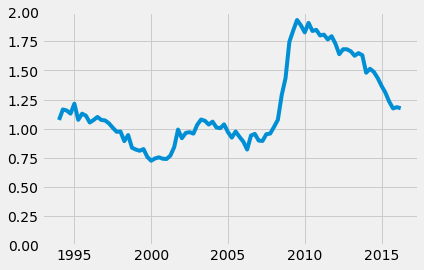

In [101]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns("Year",year,"PTER",pter)
plots.plot(pter_over_time.column('Year'), pter_over_time.column('PTER'))
plots.ylim(0,2); # Do not change this line

In [102]:
grader.check("q1_6")

All tests passed!

**Question 1.7.** 대공황 기간 동안 PTER 비율이 높았는가(즉, 2008년부터 2011년까지 PTER 비율이 특히 높았는가)? 만약 여러분이 생각하기에 PTER 비율이 이 기간 동안에 높았다면 `highPTER`에 `True`를, 그렇지 않으면 `False`를 저장합니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_7
points:
 - 4
-->

In [103]:
highPTER = True

In [104]:
grader.check("q1_7")

All tests passed!

## 2. Birth Rates

다음 테이블은 인구 조사 (Census)를 기반으로 2015년 7월 1일과 2016년 7월 1일에 미국 각 주에 대한 인구 추계를 보여주고 있다. 마지막 네개의 열은 이 기간 동안 추정된 모집단 변화의 요소를 기술하고 있습니다. ** 아래 모든 질문의 경우 "주(states)"라고 명시된 것은 푸에르토 리코와 DC(콜롬비아 특별구)를 포함한 52개 행을 모두 가리킨다고 가정합니다.**

데이터는 [이곳](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv)에서 가지고 온 것입니다. (참고: 링크를 클릭해도 다운로드가 되지 않을 경우 해당 데이터를 링크 주소를 복사하여 웹 브라우저의 주소 표시줄에 붙이면 됩니다. 하지만 관련 파일은 이미 공유 폴더에 업로드해놓았기 때문에 이 과정이 필요없을 수도 있습니다.) 다른 열에 대한 설명을 자세히 보려면 [여기](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)를 클릭하면 됩니다.

원본 데이터가 좀 지저분합니다. 아래 셀을 실행하여 테이블을 깨끗하게 정리하여야 작업을 쉽게 할 수 있습니다.

In [105]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


**Question 2.1.** 이 기간 동안 미국의 총 연간 출산율 `us_birth_rate`을 계산하시오.
1년 동안의 연간 출생률은 해당 기간의 총 출생아 수가 해당 기간의 시작 시점에서의 총 인구 규모에서 차지하는 비율을 의미합니다.
 **(4 Points)**

*Hint:* 이 기간의 시작 연도는 언제인가? 

<!--
BEGIN QUESTION
name: q2_1
points:
 - 4
-->

In [106]:
us_birth_rate = np.sum(pop.column('BIRTHS')/pop.column('2015'))
us_birth_rate

0.6410672726840716

In [107]:
grader.check("q2_1")

All tests passed!

**Question 2.2.** **연간 이주율**의 **절대값**이 1%보다 큰 주(state)의 수를 `movers`에 저장하시오. 1년 동안의 연간 이주율은 해당 기간의 시작 시점에서의 인구 규모 대비 이동(입출국)
에 따른 순이주 수의 비율이다. `MIGRATION` 열에는 주(state)별 연간 순 이주 예상 건수가 포함되어 있습니다. **(4 Points)**

*Hint*: `migration_rates`는 테이블 형태여야 하고, `movers`는 숫자여야 합니다.

<!--
BEGIN QUESTION
name: q2_2
points:
 - 4
-->

In [108]:
# migration_rates = 순이주 수 / 2015년 인구 규모 * 100 (테이블)
# movers = migration_rates의 절대값이 1보다 큰 주의 수 (숫자)
migration_rates = Table().with_column('mig_rate',abs((pop.column('MIGRATION')/pop.column('2015')*100)))
movers = migration_rates.where('mig_rate',are.above(1)).num_rows
movers

9

In [109]:
grader.check("q2_2")

All tests passed!

**Question 2.3.** 지역 4 (미국 서부)에서의 총 출생아 수를 `west_births`에 저장하시오. **(4 Points)**

*Hint:* `REGION` 열의 값 타입을 다시 확인하고 적절하게 필터링하십시오. (즉, 타입이 일치해야 합니다.)

<!--
BEGIN QUESTION
name: q2_3
points:
 - 4
-->

In [131]:
west_births = np.sum (pop.where('REGION',4).column('BIRTHS'))
west_births

979657

In [132]:
grader.check("q2_3")

All tests passed!

**Question 2.4.** 다음 질문에서는 출생률과 사망률 사이의 관계를 이해하기 위한 시각화를 만들것입니다. 1년 동안의 연간 사망률은 해당 기간의 총 사망자 수를 해당 기간의 시작 시점의 인구 규모의 비율로 나타낸 것입니다.

주어진 기간 동안 출생률과 사망률 사이의 연관성이 있는지를 확인하기 위해 가장 적절한 시각화는 무엇입니까?

1. 선 그래프 (Line Graph)
2. 막대 차트 (Bar Chart)
3. 산점도 (Scatter Plot)

아래의 `visualization`를 올바른 시각화에 해당하는 번호로 지정하시오. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_4
points:
 - 0
 - 0
 - 4
-->

In [112]:
visualization = 3

In [113]:
grader.check("q2_4")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** 아래 코드 셀에서 해당 기간 동안의 출생률과 사망률 사이의 연관성이 있는지를 확인하는데 도움이 되는 시각화를 만드시오. 여기에 중간 과정의 테이블을 만드는 것이 도움이 될 수 있습니다. **(4 Points)**

고려해야 할 사항:

- 두 변수 사이의 연과선을 설명하는데 도움이 되는 차트 유형은 무엇입니까?
- 차트를 생성하는데 도움이 되도록 특정 테이블을 조장할 수 있는 방법은 무엇입니까?
- 이 숙제를 위해 미리 읽어보기를 권장한 자료를 확인해 보세요!

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

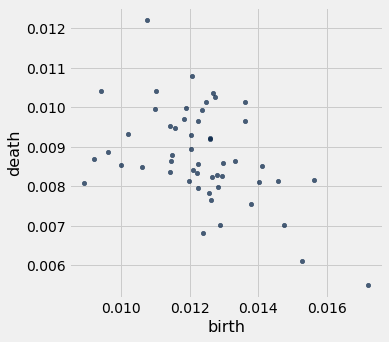

In [114]:
# In this cell, use birth_rates and death_rates to generate your visualization
birth_rates = pop.column('BIRTHS') / pop.column('2015')
death_rates = pop.column('DEATHS') / pop.column('2015')
relation_t = Table().with_columns('birth',birth_rates, 'death',death_rates)
relation_t.scatter('birth','death')

<!-- END QUESTION -->

**Question 2.6.** 이 기간 동안 출생률과 사망률 사이에는 연관성이 있습니다. (참 또는 거짓)

아래의 셀에서 `assoc`에 `True` 혹은 `False`를 지정하시오. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_6
points:
 - 4
-->

In [115]:
assoc = True

In [116]:
grader.check("q2_6")

All tests passed!

## 3. Uber

아래에서는 [Uber Movement](https://movement.uber.com) 프로젝트의 필리핀 마닐라와 매사추세츠 보스턴에서의 평일 Uber 승차 기록 200,000개가 포함된 테이블을 로드합니다.
`sourceid`와 `dstid` 열에는 각 승차의 시작과 종료 위치에 대한 코드가 들어 있습니다. 
`hod` 열에는 탑승한 날의 시간에 해당하는 코드가 들어 있습니다.  
`ride time` 열에는 승차 시간이 분 단위로 표시됩니다.

In [117]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


<!-- BEGIN QUESTION -->

**Question 3.1.** `equal_bins`의 지정된 bin을 사용하여 보스턴의 모든 승차 시간의 분포를 시각화하는 히스토그램을 생성합니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->

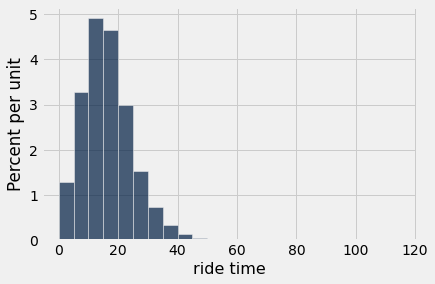

In [118]:
equal_bins = np.arange(0, 120, 5)
boston.hist('ride time', bins=equal_bins)

<!-- BEGIN QUESTION -->

**Question 3.2.** 이제 지정된 bin을 사용하여 마닐라의 모든 승차 시간의 분포를 시각화하는 히스토그램을 생성합니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

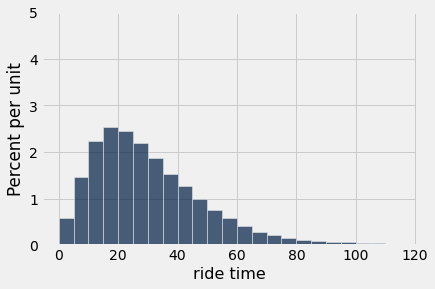

In [119]:
equal_bins = np.arange(0, 120, 5)
manila.hist('ride time',bins=equal_bins)
# Don't delete the following line!
plots.ylim(0, 0.05); #퍼센트화

<!-- END QUESTION -->

**Question 3.3.** y축 레이블을 자세히 살펴봅시다. "Percent per unit"에서 "unit"에 해당하는 것으로 아래의 (1, 2, 3) 중의 하나를 `unit_meaning`에 저장하시오. **(4 Points)**

1. minute  
2. ride time  
3. second

<!--
BEGIN QUESTION
name: q3_3
points:
 - 4
-->

In [120]:
unit_meaning = 1

In [121]:
grader.check("q3_3")

All tests passed!

**Question 4.** 각 광역시에서 15분 미만의 탑승의 비율을 `boston_under_15`와 `manila_under_15`에 저장하시오. 백분율을 계산하기 위해서는 아래에서 제공하는 높이 변수를 사용합니다. 여러분의 해답은 단지 높이 변수와 숫자 그리고 수학 연산만을 사용해야만 합니다. 여러분은 `boston`과 `manila` 테이블을 어떤 식으로든 접근해서는 안됩니다. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 4
-->

In [122]:
boston_under_5_height = 1.2
manila_under_5_height = 0.6
boston_5_to_under_10_height = 3.2
manila_5_to_under_10_height = 1.4
boston_10_to_under_15_height = 4.9
manila_10_to_under_15_height = 2.2


boston_under_15 = boston_under_5_height + boston_5_to_under_10_height + boston_10_to_under_15_height
manila_under_15 = manila_under_5_height + manila_5_to_under_10_height + manila_10_to_under_15_height

boston_under_15, manila_under_15

(9.3, 4.2)

In [123]:
grader.check("q3_4")

All tests passed!

**Question 5.** 보스턴의 승차 시간 분포에 대해 자세히 알아봅시다. `boston_median_bin`을 중위수(median) 시간을 포함하는 bin으로 아래의 시간 구간 (1, 2, 3, 4) 중의 하나로 설정하십시오. **(4 Points)**

1. 0-8 minutes  
2. 8-14 minutes  
3. 14-20 minutes  
4. 20-40 minutes  

*Hint:* 정렬된 목록에서 중위수(median)는 목록의 절반이 왼쪽에 있고, 다른 절반은 오른쪽에 있도록 하는 중간 위치의 수를 의미합니다.

<!--
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 4
-->

In [124]:
boston_median_bin = 3

In [125]:
grader.check("q3_5")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 3.6.** 통계적 속성 관점에서 히스토그램 간의 한 가지 차이를 식별합니다. 각 히스토그램의 평균 및/혹은 skew에 대해 의견을 제시할 수 있습니까? **(4 Points)**

*Hint*: 이 문제에 대한 가장 좋은 방법은 두 히스토그램 (3.1과 3.2)을 시각적으로 비교하는 것입니다.

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

boston과 manila 모두 right-skewed 특성을 가집니다.

힌트에서 제시한대로 히스토그램을 비교해서 평균을 비교해본 결과,
boston보다 manila의 승차 시간의 평균이 더 길다는 것을 알 수 있습니다.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.7.** Question 3.6에 대한 답변의 이유는 무엇입니까? 다음의 두 글 중 하나를 기준으로 보스턴과 마닐라의 분포가 다른 이유를 설명하시오. **(4 Points)**

- [Boston reading](https://www.climatestotravel.com/climate/united-states/boston)
- [Manila reading](https://manilafyi.com/why-is-manila-traffic-so-bad/)

*Hint:* 두 도시가 차이를 일으킬 수 있는 외부 요인에 대해 생각해보세요! 여러 가지 요인이 작용하고 있을 수 있습니다.

<!--
BEGIN QUESTION
name: q3_7
manual: true
-->

Manila reading 자료에 의하면 manila가 boston보다 탑승 시간이 더 긴 이유는 manila의 비효율적인 교통 설계, 운전에 대한 좋은 대안의 부족, 교통법규의 약한 시행 때문입니다.

<!-- END QUESTION -->



## 4. Histograms

다음의 산점도를 살펴보세요:

![](https://drive.google.com/uc?export=view&id=1ZIGWSH89HLkVYdNzlB5SLO7JkFg4RIEK)

그래프의 축은 $x$와 $y$라는 두 변수의 값을 나타냅니다.

`t`라는 테이블에 두 개의 열이 있다고 가정합니다:

- `x`: 산점도에 있는 점들의 x값이 들어 있는 열
- `y`: 산점도에 있는 점들의 y값이 들어 있는 열

아래는 각각 `x` 열에 대한 히스토그램, `y` 열에 대한 히스토그램, 두 열 중 어디에도 해당하지 않는 히스토그램입니다.

**히스토그램 A:**

![](https://drive.google.com/uc?export=view&id=1mws6aYNMwDvn6ceEbTJBpM3T0k23kFZo)

![](var3.png)

**히스토그램 B:**

![](https://drive.google.com/uc?export=view&id=1C487uXhwbS4jaKoGZsYkZ4qRxY32DITH)


**히스토그램 C:**

![](https://drive.google.com/uc?export=view&id=1YrwyyJnNLdzsIlkZGgrlusHKjVn4RL04)


**Question 4.1.** `t.hist('x')`을 실행한다고 가정합니다. 이 코드는 어느 히스토그램을 만들어낼까요? `histogram_column_x`에 1, 2, 혹은 3 중의 하나를 저장합니다. **(5 Points)**

1. 히스토그램 A
2. 히스토그램 B
3. 히스토그램 C

<!--
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 4
-->

In [126]:
histogram_column_x = 3

In [127]:
grader.check("q4_1")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 4.2.** Question 4.1에서 해당 히스토그램을 선택한 이유를 하나 이상 입력하시오. **어떤 히스토그램을 선택했는지 명확히 표시하기 바랍니다.** (예, "히스토그램 A를 선택한 이유는 ... 입니다."). **(5 Points)**

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

산점도에서 x가 [-1,0] 구간에 가장 많이 분포하고 있으므로 이와 동일한 특성을 가지는 [-1,0] 구간에서 가장 많은 비율을 차지하는 히스토그램 C를 선택했습니다. 

<!-- END QUESTION -->

**Question 4.3.** `t.hist('y')`을 실행한다고 가정합니다. 이 코드는 어느 히스토그램을 만들어낼까요? `histogram_column_y`에 1, 2, 혹은 3 중의 하나를 저장합니다. **(5 Points)**

1. 히스토그램 A
2. 히스토그램 B
3. 히스토그램 C

<!--
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 4
-->

In [128]:
histogram_column_y = 2

In [129]:
grader.check("q4_3")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 4.4.** Question 4.3에서 해당 히스토그램을 선택한 이유를 하나 이상 입력하시오. **어떤 히스토그램을 선택했는지 명확히 표시하기 바랍니다.** (예, "히스토그램 A를 선택한 이유는 ... 입니다."). **(5 Points)**

<!--
BEGIN QUESTION
name: q4_4
manual: true
-->

산점도에서 [-0.5,0.5] 구간에 아예 값이 존재하지 않습니다. 그래서 이와 동일하게 [-0.5,0.5] 구간에 아무런 값을 가지지 않는 히스토그램 B를 선택했습니다.

숙제 03이 완료되었습니다! 테스트를 실행하고 모두 통과했는지 확인한 다음 **File** 메뉴에서 **Save and pin revision**을 선택한 다음 **마지막 셀을 실행**하여 숙제를 제출합니다. 만약 여러분이 여러번 제출할 경우에는 마지막으로 제출된 것만을 고려할 것입니다.

---

여러분의 숙제를 재확인하기 위해 아래의 셀은 자동 채점을 모두 재실행할 것입니다.

In [134]:
grader.check_all()

q1_1:

    All tests passed!
    

q1_2:

    All tests passed!
    

q1_3:

    All tests passed!
    

q1_4:

    All tests passed!
    

q1_5:

    All tests passed!
    

q1_6:

    All tests passed!
    

q1_7:

    All tests passed!
    

q2_1:

    All tests passed!
    

q2_2:

    All tests passed!
    

q2_3:

    All tests passed!
    

q2_4:

    All tests passed!
    

q2_6:

    All tests passed!
    

q3_3:

    All tests passed!
    

q3_4:

    All tests passed!
    

q3_5:

    All tests passed!
    

q4_1:

    All tests passed!
    

q4_3:

    All tests passed!

## Submission

아래 셀을 실행하기 전에 노트북의 모든 셀을 순서대로 실행했는지 확인하여 모든 이미지/그래프가 출력에 나타나도록 하십시오. 아래 셀은 제출할 zip 파일을 생성합니다. **내보내기 전에 저장하십시오!**

In [135]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

구글 코랩에서 grader 현재 버전은 위의 zip 파일 링크가 작동되지 않고, 현재 디렉토리(구글 드라이브의 .../hw/hw03/) 내에 hw03.zip으로 저장되어 있습니다. 따라서 해당 zip 파일을 LMS에 제출하면 됩니다. 